In [219]:
# import the modules
import numpy as np
import geopandas as gp
import pandas as pd
import os
import json
import matplotlib.pyplot as plt
import pylab as pl
%pylab inline
%matplotlib inline
import statsmodels.api as sm

Populating the interactive namespace from numpy and matplotlib


In [39]:
# seed the random
myseed = np.random.seed(201510)
myseed

In [40]:
# load the data with GeoDataFrame
nrg = gp.GeoDataFrame.from_csv(os.getenv('PUI2015')+'/HW5/Energy_and_Water_Data_Disclosure_for_Local_Law_84__2013_.csv')

In [183]:
# have a simple visual of the data
#print nrg.columns
#print nrg.describe()

In [184]:
bsize = gp.GeoDataFrame.from_file(os.getenv('PUI2015')+'/HW5/Manhattan/MNMapPLUTO.shp')
#print bsize.columns

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x131bad8d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10a5eb0d0>]], dtype=object)

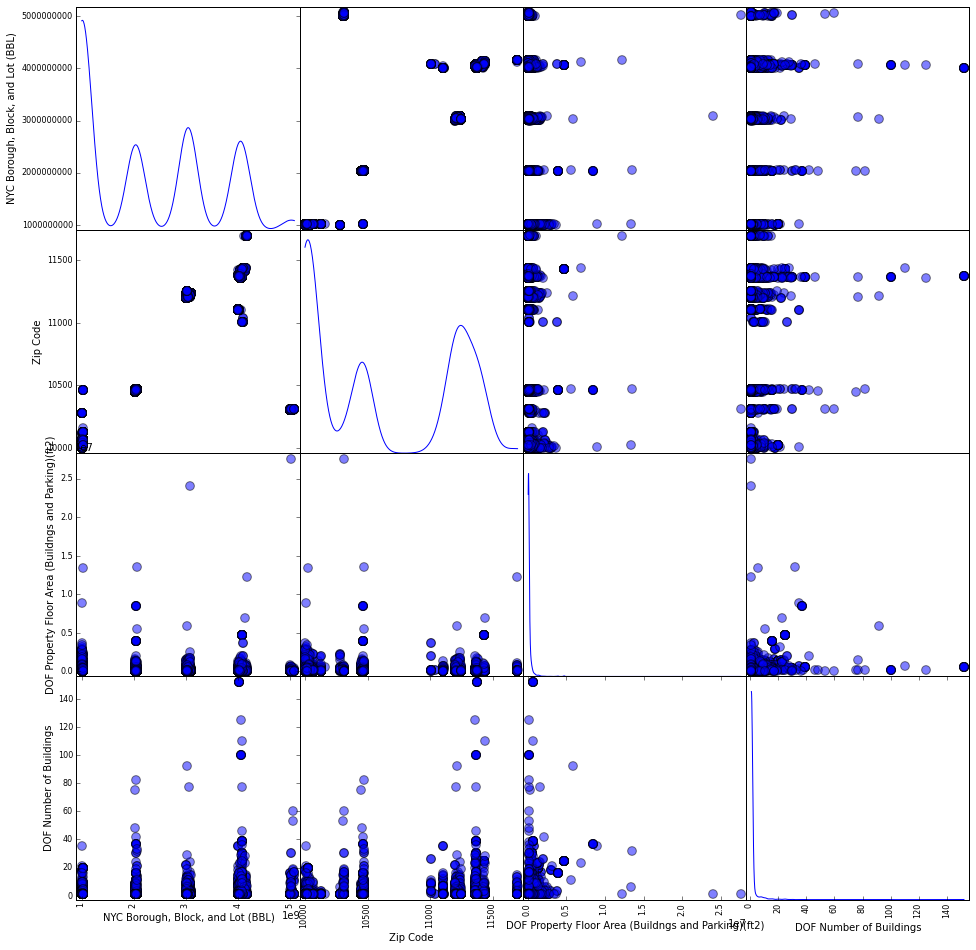

In [42]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix (nrg, s=300, figsize=(16, 16), diagonal='kde')

In [43]:
def canconvert(mydata):
    try :
        float(mydata)
        return True
    except ValueError:
        return False

Create the array here:

In [44]:
nrg['energy'] = nrg['Site EUI(kBtu/ft2)'].convert_objects(convert_numeric=True)
nrg['area'] = nrg['Reported Property Floor Area (Building(s)) (ft²)'].convert_objects(convert_numeric=True)

In [173]:
#nrg.energy.astype(float)
#nrg.area.astype(float)

In [174]:
nrg['BBL'] = nrg['NYC Borough, Block, and Lot (BBL)']

In [175]:
# merge the table file with the shape file
BBLmerge = pd.merge(nrg, bsize, on='BBL')

In [176]:
BBLmerge['Building Energy Consumption'] = BBLmerge['energy']*BBLmerge['area']

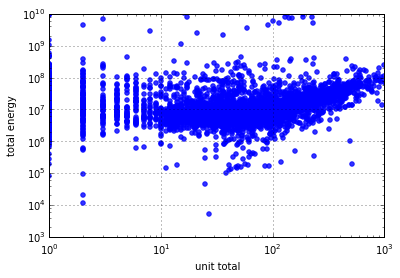

In [177]:
BBLmerge.plot(kind='scatter', x='UnitsTotal', y='Building Energy Consumption', color='b', alpha=0.8, loglog=True)
#plt.scatter(x=np.log10(BBLmerge['UnitsTotal']),y=np.log10(BBLmerge['Building Energy Consumption']),linestyle='o', color='b', alpha=0.8)
pl.xlim([1, 1000])
pl.ylim([1000, 1e10])
pl.xlabel('unit total')
pl.ylabel('total energy')
pl.grid()
pl.legend()

In [178]:
BBLcut = BBLmerge[(BBLmerge['Building Energy Consumption']>=1000)&(BBLmerge['Building Energy Consumption']<1e+10)
                  & (BBLmerge['UnitsTotal']>=1)&(BBLmerge['UnitsTotal']<1000)]

In [227]:
X = sm.add_constant(np.log10(BBLcut['UnitsTotal']))
Y = np.log10(BBLcut['Building Energy Consumption'])
myfit = sm.OLS(Y, X, missing='drop').fit() # ignores entires where x or y is NaN
print myfit.params
myfit.summary()

const         6.914340
UnitsTotal    0.074822
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     Building Energy Consumption   R-squared:                       0.011
Model:                                     OLS   Adj. R-squared:                  0.011
Method:                          Least Squares   F-statistic:                     56.32
Date:                         Wed, 14 Oct 2015   Prob (F-statistic):           7.26e-14
Time:                                 00:04:26   Log-Likelihood:                -3378.5
No. Observations:                         4956   AIC:                             6761.
Df Residuals:                             4954   BIC:                             6774.
Df Model:                                    1                                         
Covariance Type:                     nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          6.9143      0.018    387.562      0.000         6.879     6.949
UnitsTotal     0.0748      0.010      7.505      0.000         0.055     0.094
==============================================================================
Omnibus:                     1218.354   Durbin-Watson:                   1.576
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10046.460
Skew:                           0.941   Prob(JB):                         0.00
Kurtosis:                       9.716   Cond. No.                         6.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

5


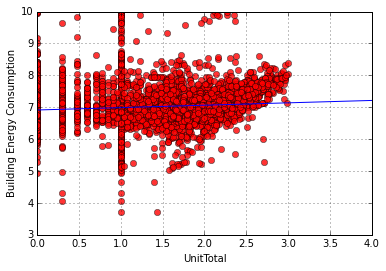

In [192]:
#plot the fit line
xline = np.arange(0,5)
yline = myfit.params[1]*xline + myfit.params[0]
print len(xline)
plt.plot(X,Y,'ro', alpha = 0.8)
#plot the dots
plt.plot(xline, yline, 'b', )
plt.xlabel('UnitTotal')
plt.ylabel('Building Energy Consumption')
plt.grid()
plt.legend()

In [187]:
# fit x and y the other way around
Xr = sm.add_constant(np.log10(BBLcut['Building Energy Consumption']))
Yr = np.log10(BBLcut['UnitsTotal'])
myfit1 = sm.OLS(Yr, Xr, missing='drop').fit() # ignores entires where x or y is NaN
print myfit1.params
myfit1.summary()

const                          0.597087
Building Energy Consumption    0.150234
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             UnitsTotal   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     56.32
Date:                Tue, 13 Oct 2015   Prob (F-statistic):           7.26e-14
Time:                        23:28:38   Log-Likelihood:                -5105.9
No. Observations:                4956   AIC:                         1.022e+04
Df Residuals:                    4954   BIC:                         1.023e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------
const                           0.5971      0.141      4.228      0.000         0.320     0.874
Building Energy Consumption     0.1502      0.020      7.505      0.000         0.111     0.189
==============================================================================
Omnibus:                      795.078   Durbin-Watson:                   1.463
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1226.734
Skew:                          -1.157   Prob(JB):                    4.15e-267
Kurtosis:                       3.763   Cond. No.                         106.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

5


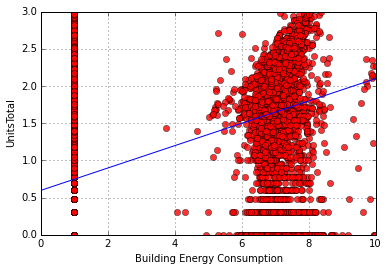

In [193]:
# change x and y and plot it again
xr = np.arange(0,11)
yr = myfit1.params[1]*xr + myfit1.params[0]
# print len(xline)
plt.plot(Xr,Yr,'ro', alpha = 0.8)
#plot the dots
plt.plot(xr, yr, 'b', )
plt.xlabel('Building Energy Consumption')
plt.ylabel('UnitsTotal')
plt.grid()
plt.legend()

##The Energy vs Unit plot is better. I can't do a likelihood ratio test because the two models have the same degree of freedom. The likelihood ratio can only be done when the degrees of freedom are different.

In [208]:
# make a curve
Xr = np.log10(BBLcut['UnitsTotal'])
Yr = np.log10(BBLcut['Building Energy Consumption'])
w2, w1, w0 = np.polyfit(Xr, Yr, 2)

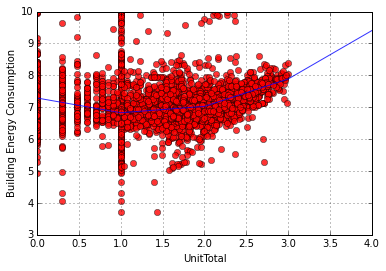

In [222]:
#plot it
xc = np.arange(0,5)
yc =w2*xc**2 + w1*xc + w0
plt.plot(X,Y,'ro', alpha = 0.8)
plt.plot(xc,yc,'b', alpha = 0.8)
plt.xlabel('UnitTotal')
plt.ylabel('Building Energy Consumption')
plt.grid()
plt.legend()

In [226]:
modelC = sm.OLS(Xr, Yr, missing='drop').fit()
modelC.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             UnitsTotal   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                 2.944e+04
Date:                Wed, 14 Oct 2015   Prob (F-statistic):               0.00
Time:                        00:04:18   Log-Likelihood:                -5114.8
No. Observations:                4956   AIC:                         1.023e+04
Df Residuals:                    4955   BIC:                         1.024e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------
Building Energy Consumption     0.2347      0.001    171.588      0.000         0.232     0.237
==============================================================================
Omnibus:                      888.088   Durbin-Watson:                   1.463
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1440.951
Skew:                          -1.238   Prob(JB):                         0.00
Kurtosis:                       3.922   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## According to the analysis, we still can't do the likelihood ratio test because the degree of freedom for the curve model is still 1.